In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
music_df = pd.read_csv(r'C:\Users\segun\OneDrive\Desktop\3mtt assignment folder\music.csv')
music_df.tail()

,age,gender,genre
13,27,0,Acoustic
14,30,0,Acoustic
15,31,0,Classical
16,34,0,Classical
17,35,0,Classical


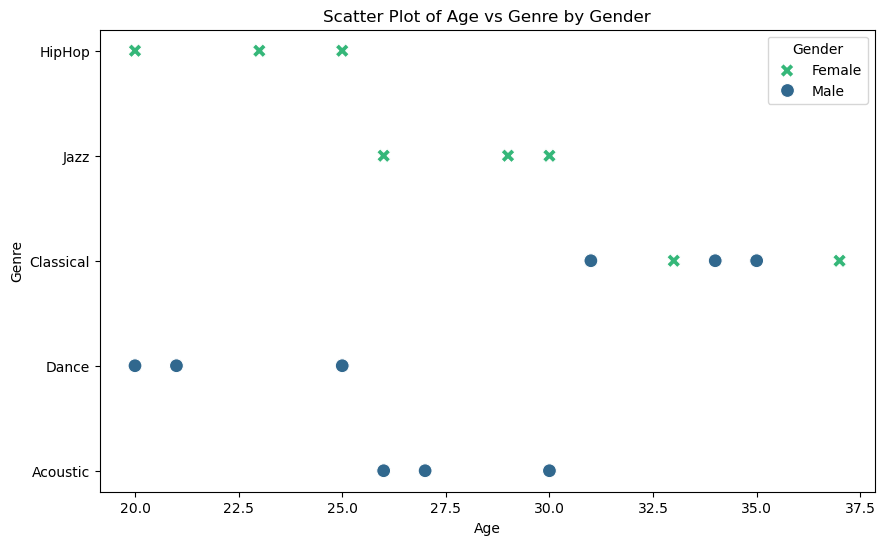

In [3]:
# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='genre', hue='gender', style='gender', data=music_df, palette='viridis', s=100)
plt.title('Scatter Plot of Age vs Genre by Gender')
plt.xlabel('Age')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [4]:
#  Inspect the Data
print("Data Overview:")
print(music_df.head())
print("\nMissing Values:\n", music_df.isnull().sum())

Data Overview:
   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz
4   29       1    Jazz

Missing Values:
 age       0
gender    0
genre     0
dtype: int64


In [5]:
music_df['genre'].value_counts()

genre
Classical    6
HipHop       3
Jazz         3
Dance        3
Acoustic     3
Name: count, dtype: int64

In [6]:
# Clean the Data
# Removing duplicates (if any)
music_df.drop_duplicates(inplace=True)

In [7]:
# Encoding 'genre' as a categorical feature and then transforming to numeric codes for modeling
label_encoder = LabelEncoder()
music_df['genre'] = label_encoder.fit_transform(music_df['genre'])

# Separate features (X) and label (y)
X = music_df[['age', 'gender']]
y = music_df['genre']

In [8]:
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [9]:
y

0     3
1     3
2     3
3     4
4     4
5     4
6     1
7     1
8     1
9     2
10    2
11    2
12    0
13    0
14    0
15    1
16    1
17    1
Name: genre, dtype: int32

In [10]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Create a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('knn', KNeighborsClassifier()) 
])

In [12]:
#  Set up RandomizedSearchCV for Hyperparameter Tuning
param_distributions = {
    'knn__n_neighbors': randint(1, 20),     # Number of neighbors to consider in KNN
    'knn__p': [1, 2],                       # Power parameter for Minkowski metric (1 for Manhattan, 2 for Euclidean)
    'knn__weights': ['uniform', 'distance'] # Weight function used in prediction
}

In [13]:
# Using RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_distributions, n_iter=10, scoring='accuracy', cv=5, random_state=42, refit=True
)

In [14]:
# Step 7: Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

C:\Users\segun\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\segun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\segun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\segun\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\segun\anaconda3\Lib\site-packages\skle

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011BBDA5F830>,
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='accuracy')

In [15]:
#  Make Predictions
y_pred = random_search.predict(X_test)

In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 66.67%


In [17]:
# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\segun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Precision: 47.22%
Recall: 66.67%
F1 Score: 54.44%


In [19]:
# Automatically adjust target names based on unique classes in y_test and y_pred
unique_classes = sorted(set(y_test) | set(y_pred))  # Combine classes in both y_test and y_pred
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_classes]

In [20]:
# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       0.50      1.00      0.67         1
      HipHop       0.67      1.00      0.80         2
        Jazz       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.54      0.75      0.62         6
weighted avg       0.47      0.67      0.54         6



C:\Users\segun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\segun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\segun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
y_pred

array([3, 3, 1, 1, 3, 0])

In [21]:
# Display the best hyperparameters found by RandomizedSearchCV
print("\nBest Hyperparameters:\n", random_search.best_params_)


Best Hyperparameters:
 {'knn__n_neighbors': 2, 'knn__p': 2, 'knn__weights': 'distance'}
